<a href="https://colab.research.google.com/github/utper/Capstone/blob/master/2-2-7-ExploringCategorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start with a simple neural network for MNIST
Note that there are 2 layers, one with 20 neurons, and one with 10.

The 10-neuron layer is our final layer because we have 10 classes we want to classify.

Train this, and you should see it get about 98% accuracy

In [1]:
# Este código entrena una red neuronal para reconocer números escritos a mano.
# Load libraries
import sys

import tensorflow as tf

In [2]:
# This script requires TensorFlow 2 and Python 3.
if sys.version_info.major < 3:
    raise Exception((f"The script is developed and tested for Python 3. "
                     f"Current version: {sys.version_info.major}"))

if tf.__version__.split('.')[0] != '2':
    raise Exception((f"The script is developed and tested for tensorflow 2. "
                     f"Current version: {tf.__version__}"))

**Funciones de activación:**

1.- ReLU (Rectified Linear Unit)
* Se usa en la capa oculta de la red neuronal.
* Su fórmula es:
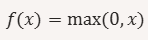

* Convierte valores negativos en cero y deja los positivos iguales.
* Es popular porque introduce no linealidad y evita problemas como el desvanecimiento del gradiente.
* Ayuda a que el modelo aprenda patrones complejos y acelera el entrenamiento.

2.- Softmax
* Se usa en la capa de salida cuando el problema es clasificación.
* Convierte las salidas de la red en probabilidades para cada clase.
* Su fórmula es:
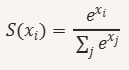
* Cada salida estará entre 0 y 1 y la suma total de todas las clases será 1.
* Permite que el modelo haga una predicción indicando la clase más probable.

En tu modelo, relu ayuda a extraer características importantes de las imágenes y softmax convierte la predicción en probabilidades comprensibles.

In [4]:
# Carga del conjunto de datos MNIST:
# Cuando decimos que "cargamos los datos de MNIST", nos referimos a obtener el conjunto de datos de imágenes y etiquetas que forman
# parte de la base de datos MNIST.
# Esta base de datos contiene 70,000 imágenes de dígitos escritos a mano (del 0 al 9), con 60,000 imágenes para entrenamiento y 10,000
# para validación.
# * training_images y training_labels: se usan para entrenar el modelo.
# * val_images y val_labels: se usan para evaluar qué tan bien funciona el modelo con datos nuevos.
# Cada imagen es una matriz de 28x28 píxeles en escala de grises, y las etiquetas indican qué número representa cada imagen.
data = tf.keras.datasets.mnist
(training_images, training_labels), (val_images, val_labels) = data.load_data()

# Normalización de imágenes:
# Los valores de los píxeles en las imágenes de MNIST van de 0 a 255
# Se escalan los valores de píxeles a un rango de 0 a 1 dividiéndolos por 255, lo que ayuda a la convergencia del entrenamiento.
training_images  = training_images / 255.0
val_images = val_images / 255.0

# Definición del modelo:
# Se crea una red neuronal con tres capas:
# * Flatten: Convierte la imagen 28x28 en un vector de 784 elementos.
# * Dense(20, activation=tf.nn.relu): Capa oculta con 20 neuronas y activación ReLU.
# * Dense(10, activation=tf.nn.softmax): Capa de salida con 10 neuronas (una por cada dígito) y activación softmax para clasificación.
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Compilación del modelo:
# Se usa el optimizador adam y la función de pérdida sparse_categorical_crossentropy, adecuada para clasificación con etiquetas enteras.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo:
# Se entrena la red durante 20 épocas con las imágenes y etiquetas de entrenamiento, validando con imágenes y etiquetas de validación.
model.fit(training_images, training_labels, epochs=20, validation_data=(val_images, val_labels))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8075 - loss: 0.6636 - val_accuracy: 0.9225 - val_loss: 0.2628
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9269 - loss: 0.2526 - val_accuracy: 0.9363 - val_loss: 0.2199
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9384 - loss: 0.2136 - val_accuracy: 0.9427 - val_loss: 0.1962
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9487 - loss: 0.1755 - val_accuracy: 0.9495 - val_loss: 0.1775
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9528 - loss: 0.1617 - val_accuracy: 0.9535 - val_loss: 0.1616
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9565 - loss: 0.1503 - val_accuracy: 0.9535 - val_loss: 0.1631
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9614 - loss: 0.1365 - val_accuracy: 0.9560 - val_loss: 0.1519
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9625 - loss: 0.1264 

## Examine the test data

Using model.evaluate, you can get metrics for a test set. In this case we only have a training set and a validation set, so we can try it out with the validation set. The accuracy will be slightly lower, at maybe 96%.  This is because the model hasn't previously seen this data and may not be fully generalized for all data. Still it's a pretty good score.

You can also predict images, and compare against their actual label. The [0] image in the set is a number 7, and here you can see that neuron 7 has a 9.9e-1 (99%+) probability, so it got it right!


In [8]:
# Evaluación del modelo:
# Se evalúa la precisión del modelo con datos de validación.
model.evaluate(val_images, val_labels)

# Predicciones:
# Se obtienen predicciones para imágenes de validación. La primera predicción (classifications[0]) es un arreglo con 10 probabilidades
# (una por cada dígito). El print(val_labels[0]) muestra la etiqueta real de la primera imagen.
classifications = model.predict(val_images)
print(classifications[0])
print(val_labels[0])

# Observando el resultado, si observamos el vector de probabilidades, la posición 7 tiene el mayor valor = 9.9907434e-01.
# Este número es casi 1, lo que indica que el modelo está muy seguro de que la imagen representa un 7. Las demás probabilidades son muy
# pequeñas (cerca de cero), lo que significa que el modelo descarta casi por completo las otras opciones.
# Esto demuestra que el modelo ha aprendido correctamente a reconocer el dígito en la imagen.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9585 - loss: 0.1487
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[4.9218731e-09 2.6859456e-10 2.5543623e-05 8.9697947e-04 1.8457190e-10
 7.1628023e-08 6.5522398e-16 9.9907434e-01 2.4159974e-06 6.4694331e-07]
7


## Modify to inspect learned values

This code is identical, except that the layers are named prior to adding to the sequential. This allows us to inspect their learned parameters later.

In [9]:
data = tf.keras.datasets.mnist

(training_images, training_labels), (val_images, val_labels) = data.load_data()

training_images  = training_images / 255.0
val_images = val_images / 255.0
layer_1 = tf.keras.layers.Dense(20, activation=tf.nn.relu)
layer_2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    layer_1,
                                    layer_2])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=20)

model.evaluate(val_images, val_labels)

classifications = model.predict(val_images)
print(classifications[0])
print(val_labels[0])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8080 - loss: 0.6607
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9352 - loss: 0.2244
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9434 - loss: 0.1888
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9505 - loss: 0.1662
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9558 - loss: 0.1542
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9598 - loss: 0.1382
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9633 - loss: 0.1284
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9642 - loss: 0.1230
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9670 - loss: 0.1119
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9673 - loss: 0.1091
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9698 - loss: 0.1025
Epoch 12/20
1875/1875 ━━━━━━━━

Este código implementa una Red Neuronal Profunda (DNN, Deep Neural Network). Veamos por qué:

**1.- Estructura de capas**
* Usa Sequential(), lo que define una arquitectura de red neuronal con múltiples capas.
* Tiene una capa oculta Dense(20, activation=tf.nn.relu), que es característica de una DNN.
* Usa relu en la capa oculta, lo cual es común en redes neuronales profundas porque mejora el aprendizaje.

**2.- Entrenamiento supervisado**
Se dice que este entrenamiento es supervisado porque el modelo aprende a partir de datos etiquetados, es decir, imágenes con sus correspondientes etiquetas correctas.
* Se entrena con imágenes y etiquetas (training_images, training_labels).
* Usa adam como optimizador, lo que ayuda a ajustar los pesos de la red de manera eficiente.
* Ajusta los parámetros mediante retropropagación.

**3.- Profundidad de la red**
* Aunque tiene pocas capas comparado con modelos más avanzados, sigue siendo una red neuronal profunda porque tiene varias capas densas.
* Puede capturar patrones más complejos que un modelo de regresión o una simple Perceptrón Multicapa (MLP).

Este modelo es una DNN básica, aunque hay redes más profundas con muchas más capas ocultas. Si quisieras una CNN (Red Neuronal Convolucional), podríamos agregar capas convolucionales para mejorar la detección de características en imágenes.

# Inspect weights

If you print layer_1.get_weights(), you'll see a lot of data. Let's unpack it. First, there are 2 arrays in the result, so let's look at the first one. In particular let's look at its size.

In [12]:

# 1️⃣ layer_1.get_weights()
# * layer_1 es una capa de la red neuronal.
# * get_weights() devuelve una lista con los parámetros de la capa:
#      * get_weights()[0] → Matriz de pesos (conexiones entre neuronas).
#      * get_weights()[1] → Vector de sesgos (bias).
# 2️⃣ get_weights()[0].size
# * get_weights()[0] es la matriz de pesos de la capa.
# * .size devuelve el número total de elementos en la matriz de pesos.
#       * Si la capa tiene, por ejemplo, 28 * 28 * 20 conexiones (entrada de 28x28 y 20 neuronas), entonces .size devolvería 15680.
print(layer_1.get_weights()[0].size)

15680


The above code should print 15680. Why?

Recall that there are 20 neurons in the first layer.

Recall also that the images are 28x28, which is 784.

If you multiply 784 x 20 you get 15680.

So...this layer has 20 neurons, and each neuron learns a W parameter for each pixel. So instead of y=Mx+c, we have
y=M1X1+M2X2+M3X3+....+M784X784+C in every neuron!

Every pixel has a weight in every neuron. Those weights are multiplied by the pixel value, summed up, and given a bias.


In [13]:
print(layer_1.get_weights()[1].size)

20


The above code will give you 20 -- the get_weights()[1] contains the biases for each of the 20 neurons in this layer.

## Inspecting layer 2

Now let's look at layer 2. Printing the get_weights will give us 2 lists, the first a list of weights for the 10 neurons, and the second a list of biases for the 10 neurons

Let's look first at the weights:

In [14]:
print(layer_2.get_weights()[0].size)

200


This should return 200. Again, consider why?

There are 10 neurons in this layer, but there are 20 neurons in the previous layer. So, each neuron in this layer will learn a weight for the incoming value from the previous layer. So, for example, the if the first neuron in this layer is N21, and the neurons output from the previous layers are N11-N120, then this neuron will have 20 weights (W1-W20) and it will calculate its output to be:

W1N11+W2N12+W3N13+...+W20N120+Bias

So each of these weights will be learned as will the bias, for every neuron.

Note that N11 refers to Layer 1 Neuron 1.


In [15]:
print(layer_2.get_weights()[1].size)

10


...and as expected there are 10 elements in this array, representing the 10 biases for the 10 neurons.

Hopefully this helps you see how the element of a simple neuron containing y=mx+c can be expanded greatly into a deep neural network, and that DNN can learn the parameters that match the 784 pixels of an image to their output!